In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загурзка и предобработка данных

Датасет https://www.kaggle.com/austinreese/craigslist-carstrucks-data

## Загрузим данные, выберем целевую величину и величину, на основе которой будем делать прогноз

In [2]:
# загрузка

df = pd.read_csv('vehicles.csv')

# отображение

df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


Датасет представляет собой инофрмацию об автомобилях и их цену. Попробуем спрогнозировать цену по величине пробега, задача регрессии

In [3]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [4]:
df = df.drop(['id', 'url', 'region', 'region_url', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'], axis = 1)

df.head()

,price,odometer
0,3495,NaN
1,13750,76237.0
2,2300,199000.0
3,9000,54000.0
4,0,NaN


## Исследуем датасет на пропуски

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     435849 non-null  int64  
 1   odometer  360701 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 6.7 MB


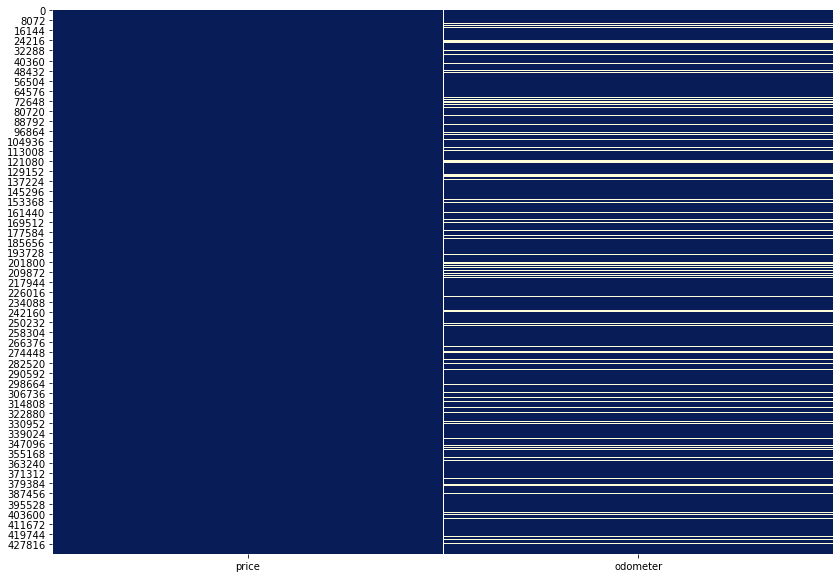

In [6]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360701 entries, 1 to 435848
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     360701 non-null  int64  
 1   odometer  360701 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.3 MB


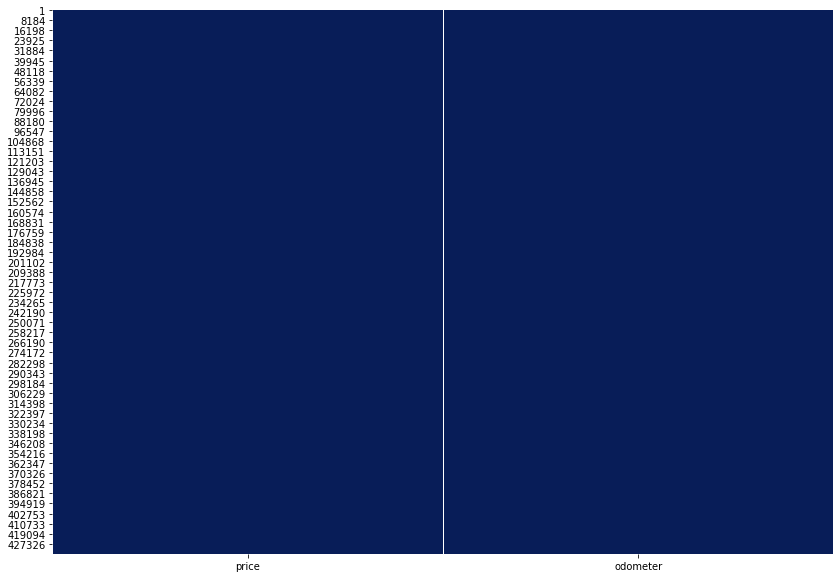

In [8]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [9]:
df = df[df['price'] != 0].reset_index(drop = True)
df.head()

,price,odometer
0,13750,76237.0
1,2300,199000.0
2,9000,54000.0
3,8500,62800.0
4,5950,102415.0


## Посмотрим основные статистики

In [10]:
df.describe()

,price,odometer
count,3.373710e+05,3.373710e+05
mean,2.674987e+04,1.004497e+05
std,4.794614e+06,1.160801e+05
min,1.000000e+00,0.000000e+00
25%,6.495000e+03,4.871400e+04
50%,1.199500e+04,9.278200e+04
75%,1.950000e+04,1.362315e+05
max,2.490531e+09,1.000000e+07


## Проверим данные на выбросы

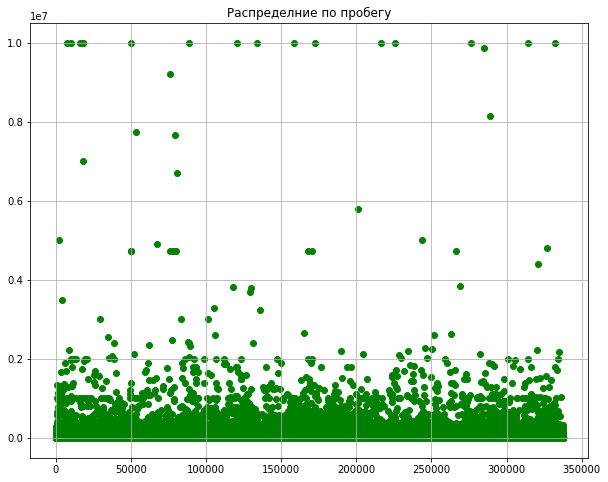

In [11]:
X = np.array(df.odometer)
plt.figure(figsize=(10,8))
plt.scatter([i for i in range(len(df))], X, c='green')
plt.title('Распределние по пробегу')
plt.grid()

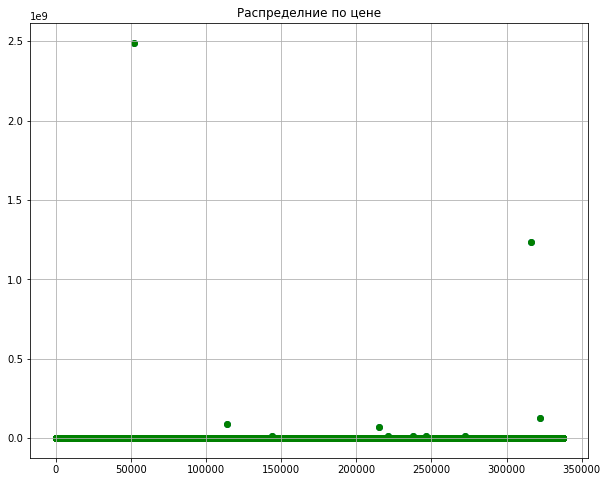

In [12]:
X = np.array(df.price)
plt.figure(figsize=(10,8))
plt.scatter([i for i in range(len(df))], X)
plt.scatter([i for i in range(len(df))], X, c='green')
plt.title('Распределние по цене')
plt.grid()

По цене выбросов не много, по пробегу есть много выбросов, сделаем датафрейм с выбросами и без

In [13]:
df_clean = df[df['odometer'] < 0.05 * 1e7].reset_index(drop = True)
df_clean =  df_clean[df_clean['price'] < 1e6].reset_index(drop = True)
for i in range(3):
    df_clean  = df_clean.sample(frac=1).reset_index(drop=True)
df_clean =  df_clean[:50000].reset_index(drop = True)
len(df), len(df_clean)

(337371, 50000)

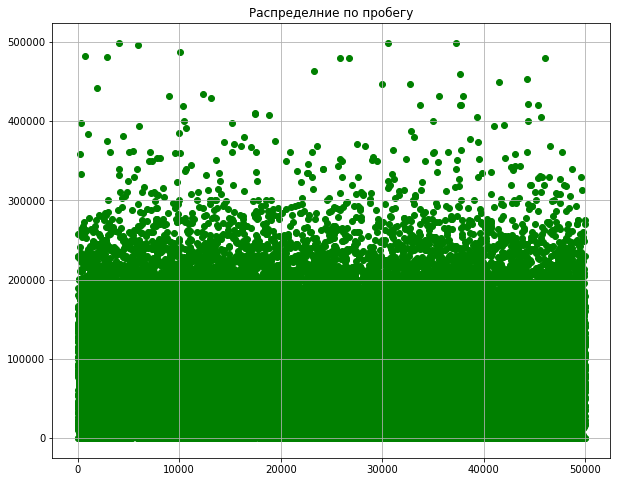

In [14]:
X = np.array(df_clean.odometer)
plt.figure(figsize=(10,8))
plt.scatter([i for i in range(len(df_clean))], X, c='green')
plt.title('Распределние по пробегу')
plt.grid()

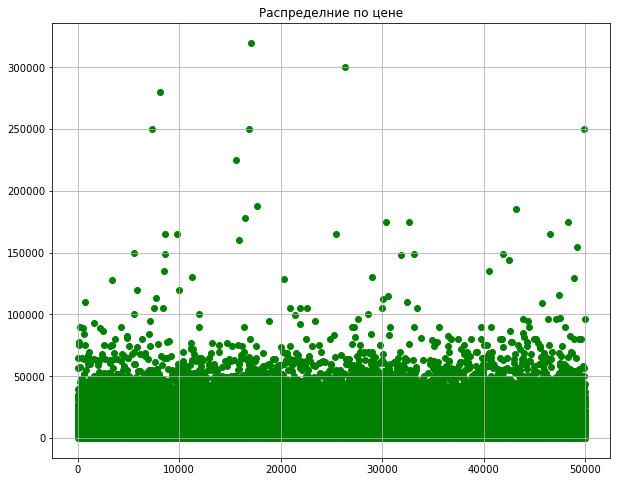

In [15]:
X = np.array(df_clean.price)
plt.figure(figsize=(10,8))
plt.scatter([i for i in range(len(df_clean))], X, c='green')
plt.title('Распределние по цене')
plt.grid()

## Построим корреляционную матрицу

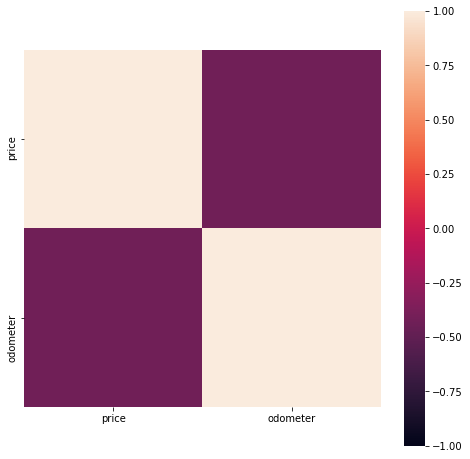

In [16]:
plt.subplots(figsize=(8,8))
sns.heatmap(df_clean.corr(), vmin=-1, square=True)
plt.show()

## Построим распределение цены от пробега

In [17]:
df_clean.head()

,price,odometer
0,4999,228475.0
1,12900,128000.0
2,3900,164000.0
3,6995,115342.0
4,10995,39000.0


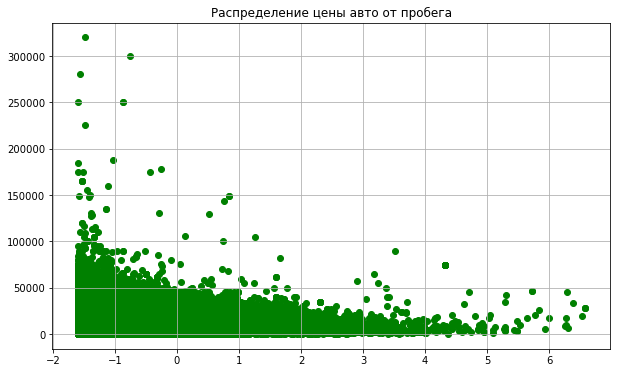

In [18]:
df_сlean = df_clean.sort_values(by='odometer').reset_index(drop=True)
X = np.array(df_clean.odometer)
Y = np.array(df_clean.price)
Y_mean = Y.mean()
Y_std = Y.std()
Y_norm = (Y-Y_mean)/Y_std
X = (X - X.mean())/X.std()


plt.figure(figsize = (10,6))
plt.scatter(X,Y, c='green')
plt.title('Распределение цены авто от пробега')
plt.grid()
plt.show()

# МНК

## Поиск степени многочлена МНК

In [19]:
m = 0
W = [1, 1]
m_list = []
Y_pred_list = []
W_list = []
H_list = []
for k in range(11):
    H = []
    for x in X:
        row = [x**i for i in range(m+1)]
        H.append(row)
    
    H = np.array(H)
    H_list.append(H)
    
    W = np.dot(np.dot(np.linalg.inv(np.dot(H.T,H)),H.T),Y)
    Y_pred_list.append(np.dot(H,W))
    W_list.append(W)
    m_list.append(m)
    m = m + 1

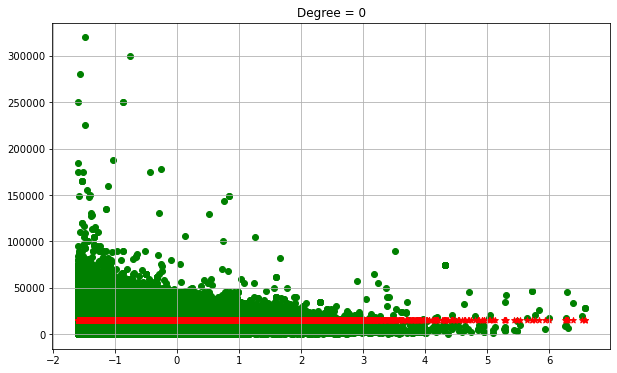

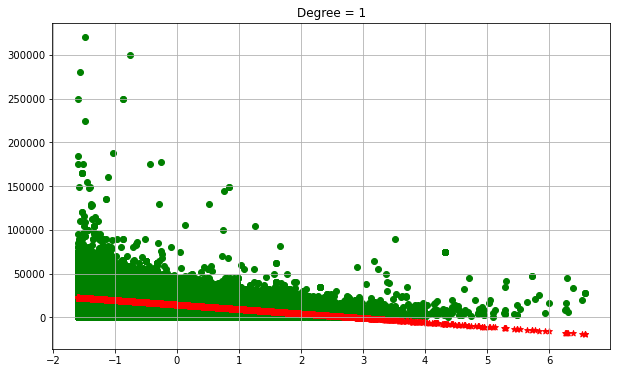

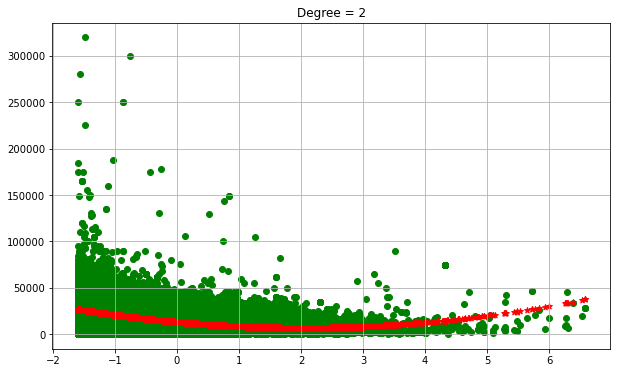

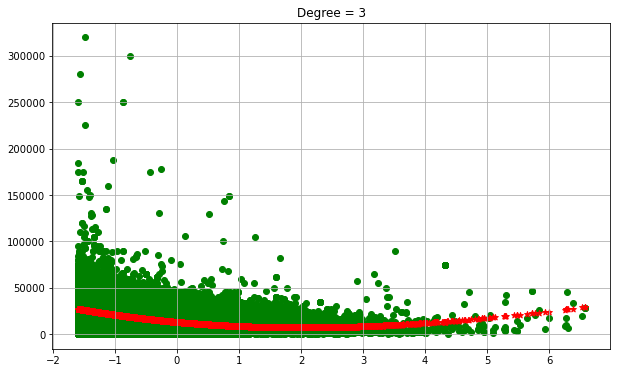

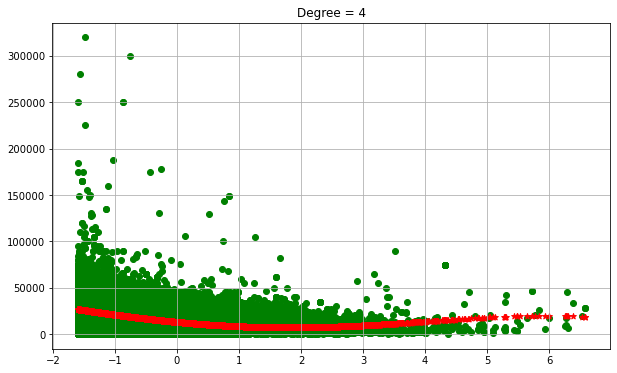

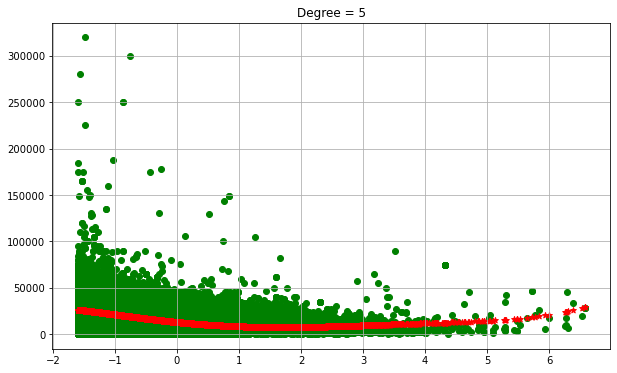

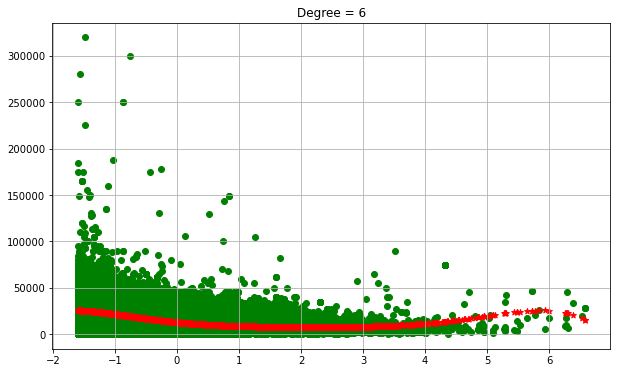

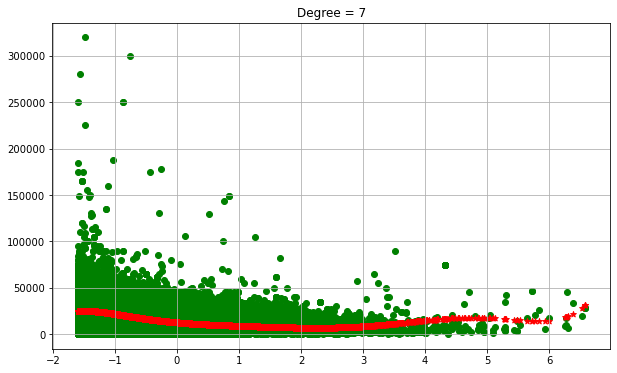

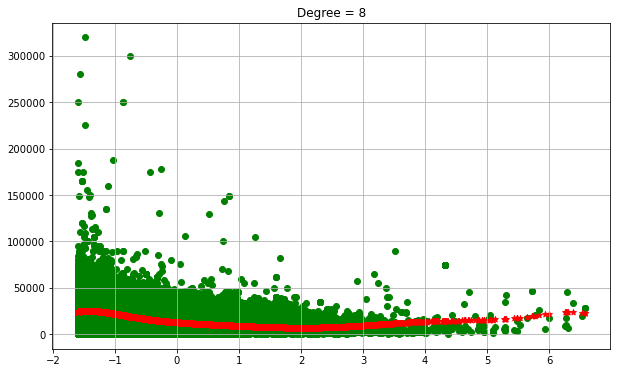

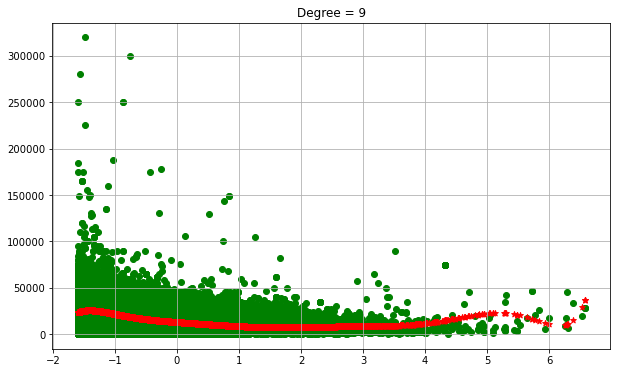

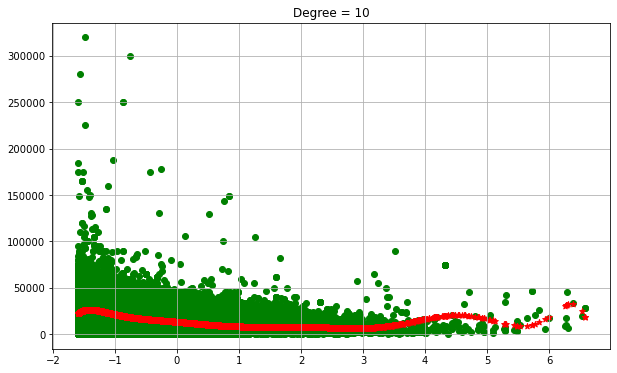

In [20]:
for Y_pred, m in zip(Y_pred_list, m_list):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(X,Y,c ='green')
    ax.scatter(X, Y_pred, color = 'red', marker = '*')
    ax.set_title(f'Degree = {m}')
    ax.grid()

## R2 score

In [21]:
def r2_score(y, y_pred):
    return 1 - np.sum((y-y_pred)**2)/np.sum((y - y.mean())**2)

r2_list = []
for Y_pred in Y_pred_list:
    r2_list.append(r2_score(Y,Y_pred))

r2_list

[0.0,
 0.17865835665424568,
 0.2167792065597255,
 0.2170746388243452,
 0.21746697459103836,
 0.21788543303326013,
 0.21867577507594227,
 0.21976396260349984,
 0.22012522615097907,
 0.2212607830890464,
 0.223645286433915]

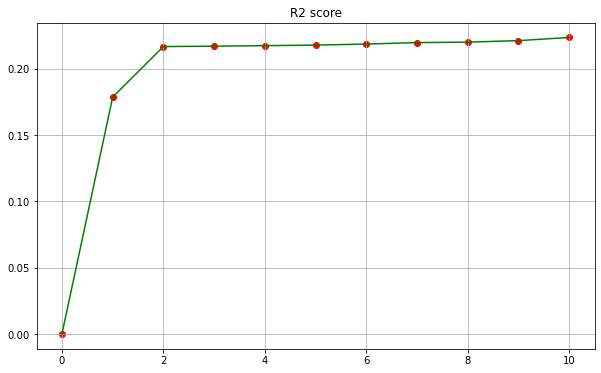

In [22]:
plt.figure(figsize=(10,6))
plt.plot(m_list,r2_list, color = 'green')
plt.scatter(m_list,r2_list, color = 'red')
plt.title('R2 score')
plt.grid()
plt.show()

Выберем многочлен 3 степени, так как он лучше всего повторяет наблюдения, не переобучается, имеет схожий r2 score

## Вычисялем остатки регрессии

In [23]:
m_res = m_list[3]
Y_pred_res = Y_pred_list[3]
H_res = H_list[3]
W_res = W_list[3]
eps = Y_pred_res - Y
eps

array([ 2081.04875198, -2535.72591401,  4376.67639718, ...,
       -1671.67402503,  5725.0891005 ,  3209.70764194])

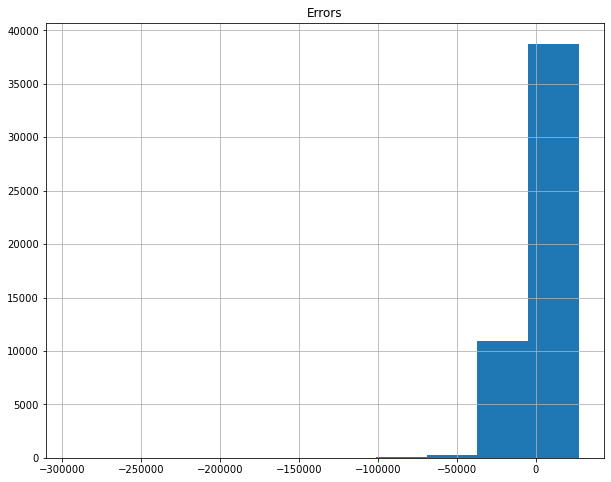

In [24]:
plt.figure(figsize=(10,8))
plt.hist(eps)
plt.title('Errors')
plt.grid()
plt.show()

## Проверка остатков регрессии на гауссовость

### Критерий Хи квадрат Пирсона

In [25]:
def to_nominal(x, k):
    x_sort = np.sort(x)
    x_in_scale = np.zeros(k)
    slices = np.linspace(x_sort[0], x_sort[-1], k+1)
    for i in range(k):
        x_part = x[x >= slices[i]]
        x_count = (x_part <= slices[i+1]).sum()
        x_in_scale[i] = x_count
    return x_in_scale, slices

def Pirson_test(x, alpha = 0.05):
    # флаг, который указывает, принимаем H0 или отвергаем : 1-отвергаем, 0 - принимаем
    complete = 0
    # кол-во элементов в выборке
    n = len(x)
    # переводим в номинальную шкалу
    x_nom, scale = to_nominal(x, 2000)
    # вычисялем вероятности попадания в отрезок
    p = np.array([])
    for i in range (len(scale)-1):
        p = np.append(p, stats.norm.cdf(scale[i+1]) - stats.norm.cdf(scale[i]))
    p =np.where(p !=0 , p, 1e-10)
    t_value = np.sum((x_nom / n - p) ** 2 / p)
    # вычисляем p-value
    p_value = 1 - stats.chi2.cdf(t_value, (len(x_nom) - 1))
    # принимаем H0 или отвергаем
    if p_value > alpha:
        complete = 0
    else:
        complete = 1
    return t_value, p_value, complete

In [26]:
Pirson_test(eps)

(66914339.00005004, 0.0, 1)

### scipy.stats.normaltest

In [27]:
alpha = 0.05
stat, p_value = stats.normaltest(eps)
if p_value < alpha:
    print (f'Не гауссовское распределение, p_value ={p_value}')
else:
    print ('Гауссовское распределение')

Не гауссовское распределение, p_value =0.0


# М-оценка Хьюбера 

In [28]:
delta_Hubera =  1.345/2

def huber(u):
    
    return u**2/2 if abs(u) <= delta_Hubera else delta_Hubera*(abs(u) - delta_Hubera/2)

def func_min_huber(theta):
    return np.sum( [ huber( y - np.sum( theta * h )) for y, h in zip(Y_norm,H_res) ] )

In [29]:
from scipy.optimize import fmin

theta_res_huber = fmin(func_min_huber, W_res)

Optimization terminated successfully.
         Current function value: 10981.303083
         Iterations: 320
         Function evaluations: 547


In [30]:
Y_pred_huber = np.dot(H_res,theta_res_huber)

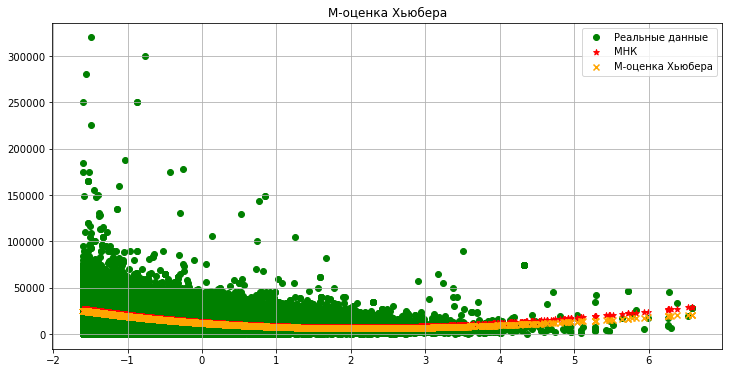

In [31]:
plt.figure(figsize=(12,6))
plt.scatter(X,Y, label='Реальные данные', c='green')
plt.scatter(X,Y_pred_res, label='МНК',c='red', marker='*')
plt.scatter(X, Y_pred_huber*Y_std + Y_mean ,c='orange', label='М-оценка Хьюбера', marker='x')
plt.title('М-оценка Хьюбера')
plt.legend()
plt.grid()

# М-оценка Тьюки

In [32]:
delta_Tukey = 4.6851/2

def tukey(u):
    return 1-(1-(u/delta_Tukey)**2)**3 if abs(u) < delta_Tukey else 1

def func_min_tukey(theta):
    return np.sum( [ tukey( y - np.sum( theta * h )) for y, h in zip(Y_norm,H_res) ] )

In [33]:
from scipy.optimize import fmin
theta = np.zeros(m_res+1)
theta_res_tukey = fmin(func_min_tukey,theta)

Optimization terminated successfully.
         Current function value: 9759.916006
         Iterations: 242
         Function evaluations: 399


In [34]:
Y_pred_tukey = np.dot(H_res,theta_res_tukey)

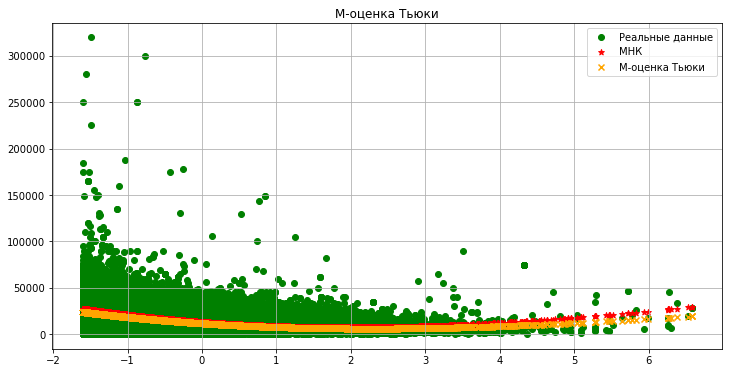

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(X,Y, label='Реальные данные', c='green')
plt.scatter(X,Y_pred_res, label='МНК',c='red', marker='*')
plt.scatter(X, Y_pred_tukey*Y_std + Y_mean ,c='orange', label='М-оценка Тьюки', marker='x')
plt.title('М-оценка Тьюки')
plt.legend()
plt.grid()